In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance
import joblib

In [2]:
input_file = 'data/ent/processed_usd_ent3_clean.csv'
output_file_d = 'ent_without_0_K_denormalized.csv'
output_file = 'ent_without_0_K.csv'
scaler_path = 'models/scaler_ent.pkl'
model_path = 'models/cluster_model_ent3_not_0.pkl'

In [7]:
def normalize(df):
    print(df.head())
    columns = df.columns
    x = df.values  # returns a numpy array
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    joblib.dump(min_max_scaler, scaler_path)
    df = pd.DataFrame(x_scaled)
    df.columns = columns
    return df

In [6]:
df1 = pd.read_csv(input_file, index_col=False)
df_res = df1.drop(['Unnamed: 0', 'RULE_CLASS_ID', 'ITIN_ID'], axis=1)
df_res.head()

,NIGHTS_IN_HOTEL,PREMIUM_CARS,BUSINESS_CLASS_RAILWAYS,BUSINESS_CLASS_AIRLINES,CAR_DAY,AIR_DAY,TRAIN_DAY,IN_CONTINENT,TOTAL_DURATION
0,6,0,0,1,0.0,0.046448,0.0,1,366
1,14,0,0,1,0.0,0.035519,0.0,1,366
2,0,0,0,1,0.0,0.030055,0.0,1,366
3,0,0,0,0,0.0,0.024590,0.0,0,366
4,0,0,0,0,0.0,0.019126,0.0,1,366


In [8]:
df = normalize(df_res)

   NIGHTS_IN_HOTEL  PREMIUM_CARS  BUSINESS_CLASS_RAILWAYS  \
0                6             0                        0   
1               14             0                        0   
2                0             0                        0   
3                0             0                        0   
4                0             0                        0   

   BUSINESS_CLASS_AIRLINES  CAR_DAY   AIR_DAY  TRAIN_DAY  IN_CONTINENT  \
0                        1      0.0  0.046448        0.0             1   
1                        1      0.0  0.035519        0.0             1   
2                        1      0.0  0.030055        0.0             1   
3                        0      0.0  0.024590        0.0             0   
4                        0      0.0  0.019126        0.0             1   

   TOTAL_DURATION  
0             366  
1             366  
2             366  
3             366  
4             366  


In [10]:
df

,NIGHTS_IN_HOTEL,PREMIUM_CARS,BUSINESS_CLASS_RAILWAYS,BUSINESS_CLASS_AIRLINES,CAR_DAY,AIR_DAY,TRAIN_DAY,IN_CONTINENT,TOTAL_DURATION
0,0.016393,0.0,0.0,1.0,0.0,0.011612,0.0,1.0,1.0
1,0.038251,0.0,0.0,1.0,0.0,0.008880,0.0,1.0,1.0
2,0.000000,0.0,0.0,1.0,0.0,0.007514,0.0,1.0,1.0
3,0.000000,0.0,0.0,0.0,0.0,0.006148,0.0,0.0,1.0
4,0.000000,0.0,0.0,0.0,0.0,0.004781,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
249157,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
249158,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
249159,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
249160,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0


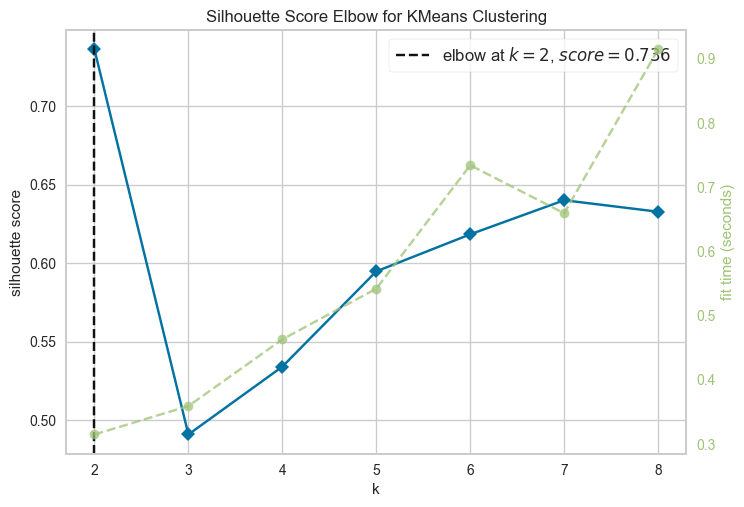

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [12]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 9), metric='silhouette')
visualizer.fit(df)  # Fit the data to the visualizer
visualizer.show()

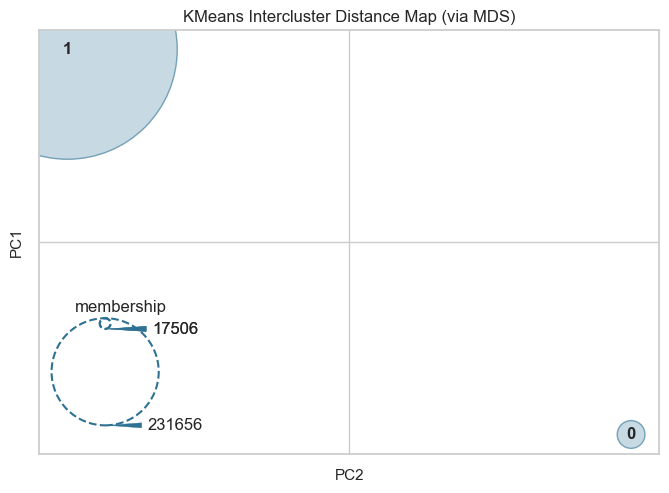

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [14]:
model = KMeans(n_clusters=2, random_state=1)
visualizer = InterclusterDistance(model)
visualizer.fit(df)  # Fit the data to the visualizer
visualizer.show()

In [16]:
cluster_labels = visualizer.fit_predict(df)
df['labels'] = cluster_labels

In [20]:
df.to_csv(output_file)
print(df['labels'].value_counts())
df_RC = df.groupby('labels')
print(df_RC)
joblib.dump(model, model_path)

1    231656
0     17506
Name: labels, dtype: int64


['models/cluster_model_ent3_not_0.pkl']

In [25]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df, cluster_labels, random_state=0)

In [22]:
df = df.drop(['labels'], axis=1)

In [28]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [32]:
pred = clf.predict(X_test)
print("Accuracy:", metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

Accuracy:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4396
           1       1.00      1.00      1.00     57895

    accuracy                           1.00     62291
   macro avg       1.00      1.00      1.00     62291
weighted avg       1.00      1.00      1.00     62291

[[ 4396     0]
 [    0 57895]]


In [57]:
def predict(arr):
    feature_cols = ['NIGHTS_IN_HOTEL','PREMIUM_CARS','BUSINESS_CLASS_RAILWAYS','BUSINESS_CLASS_AIRLINES','CAR_DAY',
                    'AIR_DAY','TRAIN_DAY','IN_CONTINENT','TOTAL_DURATION']
    df_test = pd.DataFrame(columns=feature_cols)
    df_test.loc[0] = arr
    label = clf.predict(df_test)
    probability = clf.predict_proba(df_test)
    # return label, probability
    return label[0], probability[0][label[0]]


In [38]:
test_data1=[6,0,0,1,0,0.046448087,0,1,366]
test_data2=[6,0,0,0,0.005988024,0.071856287,0,1,167]
test_data3=[4,0,0,0,0,0,0,1,4]

In [58]:
print(predict(test_data1))
print(predict(test_data2))
print(predict(test_data3))

(0, 1.0)
(0, 0.9999999999940883)
(1, 0.9878584522381542)
